## Sythesize Data from EIA.gov



The Energy Information Administration (EIA) is the statistical agency of the Department of Energy. It provides policy-independent data, forecasts, and analyses to promote sound policy making, efficient markets, and public understanding regarding energy, and its interaction with the economy and the environment. They provide an API (Application Programmable Interface) for gathering historical data. The data is provided to users through the use of an API key and crafted URL queries. More information on the API and its query parameters can be found here (http://api.eia.gov/series/). 

The API was called to retrieve monthly averaged historical values within a year time frame of retial energy pricing, residential solar generation, and residential energy usage in the state of Florida. The data was then normalized and then used to synthesize individual home usage and solar generation by setting certain assumptions of the average load and solar installation size on a typical home. A gaussian distributied variance was added to simulate user behvaiour throughout the timeframe. 

A parametric dataset was generated by sweeping through a range of each of the assumptions. The number of prosumers was set to be a maximum of 100. The average demand for each home was set from 800kWh a month to 15000h kW a month at 100kWh interval steps. The same range was given for the average generation of each home. Finally a variance was used for each of the average curves in order to add random noise to each instance of prosumers chosen. The variance rangedfrom 10% to 30% of the each curve for both generation and demand at 10% interval steps. 

The automation of the data gathering was automated utilizing Python scripting. The gathering script generated a local file used as a database anda querying script was used to request values in the form of datasets from the database.  

## Extracting Prosumer Data

The data gathered is from EIA.gov. The data was then used to synthesize typical prosumer consumption and generation over the course of 12 months. Volatitlity in the usage and generation was added as a normal distribution with a given variance to simulate real world conditions. The data is pulled from a local file and then sorted by timestamp. The fields are grouped by id and by time. Grouping by time allows for settlement calculations to occur at each time interval.

The query returns an array of datasets each with a different number of prosumers. The array for N , is requesting each dataset as a different trial of increasing prosumer count. Each trial can be plotted to see the effects as the prosumer size increases in the network.

In [1]:
import p0_data_gather as gather
import p0_data_query as conn

db = 'data/prosumer_N100_all_20210409_00.csv'
query= {
    "N" : [3,5,10],
    "demand" : 1100, # kWh/mo
    "generation" : 1300, # kWh/mo
    "demand_variance" : 0.1, # %
    "generation_variance" : 0.1 # %
}

eia_dataset_trials = conn.get_eia_dataset(database=db, query=query)


Compare net-metering vs. NRG-X-Change


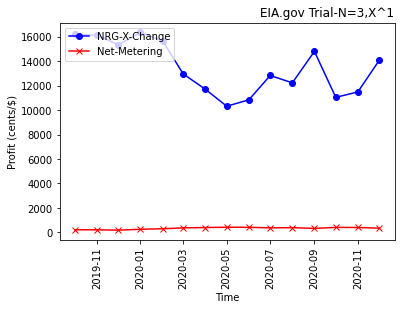

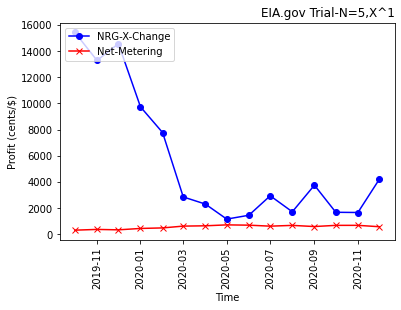

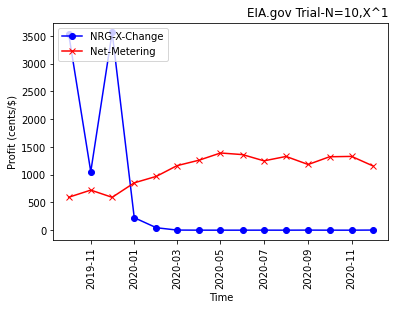

In [2]:
import p0_nrgx as nrgx
a=10000000 # Scalar for NRGXChange Payment Function g(.)
n=1 # Exponential of the characteristiv function Y=X^(n=1)
for trial in eia_dataset_trials:
    trial = nrgx.apply_payments(trial,a,n)
    trial = nrgx.apply_net_meter_payments(trial,a,n)
nrgx.plot_net_trials(trials=eia_dataset_trials,n=n)

In [ ]:
# get the data , 

## Payments with and without Coalition


### Prosumer Payment Function for P2P Transactions

The NRG-X-Change as described by the authors performs a dynamic payment to prosumers that are capable of meeting the demand of the micro-grid. The micro-grid is made of prosumers and consumers. As the load demand spikes the pricing for net generation also spikes to meet the demand. When there is too much generation on the grid the pricing drops encouraging prosumers to generate less and consumer to consume more. The payout function g(.) , utilizes a normalization component in the denominator to account for over or under generation distributing the payout along the curve. The payment is at its highest when generation meets the total demand and at its lowest as generation starts to saturate the market because of low demand. 

$$ g(x,t_p,t_c) = \frac{​​x^n* q_{t_p=t_c}​​}{e^{\frac{(t_p - t_c)^2}{a}}} $$

### Coalitional Payment using Shapley Valued Contributions 

To model the prosumer network a cooperative game model from Game theory can be leveraged. The marginal contributions to the NRG function as a group of prosumers insteaf of individual prosumers would allow for a different payout when the carhacteristic function is super-addititive. Normally the characteristic function is described by a linear payout based on the single contribution of the prosumer compared to the whole network. The design parameter of adjusting that function into a convex or a concave response would allow for super-additive payouts that would encourage coalitions to form or discourage them to form. 

In terms of a **characteristic function**, which specfies for every group of players the total payoff that the members of S can by signing an greement among themselves; this payoff is available for distribution among the members of the group. A coalitional game with transferable payoff is a pair $<N,v>$ where $N=\{1,...,n\}$ is the set of players and for every subset S of I (called a coalition) $v(S) \in \mathbb{R} $ is the total payoff that is available for division among members of S (called the worth of S). We assume that the larger the coalition the larger the payoff (this property is called superadditivity).

An agreement amongst players is a list $(x_1,x_1,...,x_n)$  where $x_1,$ is the proposed payoff to individual i. Shapley value is interpreted in terms of **expected marginal contribution**. It is calculated by considering all the possible orders of arrival of the players into a room and giving each player his marginal contribution. 

#### Linear Characteristic Function for NRG-X-Change $Y=X^{n=1}$
The result of a linear characteristic function is that the payment is the same with or without a coalition bidding for payment as a group. 

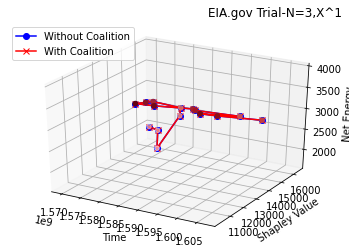

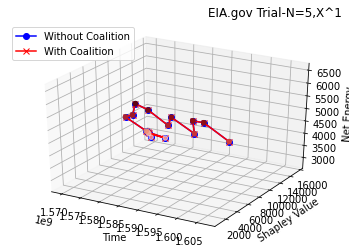

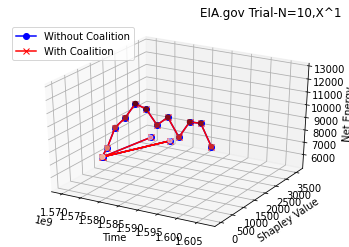

In [4]:
import p0_nrgx as nrgx
a=10000000 # Scalar for NRGXChange Payment Function g(.)
n=1 # Exponential of the characteristiv function Y=X^(n=1)
for trial in eia_dataset_trials:
    trial = nrgx.apply_payments(trial,a,n)
    
nrgx.plot_trials(trials=eia_dataset_trials,n=n)


#### Linear Characteristic Function for NRG-X-Change $Y=X^{n=1.5}$
The result of a linear characteristic function is that the payment is the same with or without a coalition bidding for payment as a group. 

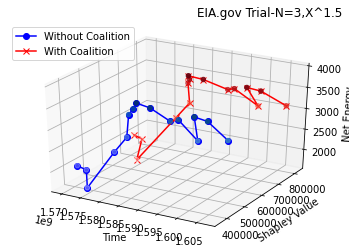

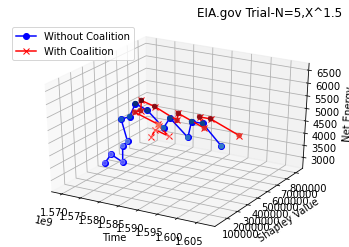

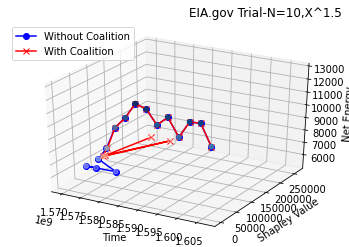

In [5]:
a=10000000 # Scalar for NRGXChange Payment Function g(.)
n=1.5 # Exponential of the characteristiv function Y=X^(n=1.5)
for trial in eia_dataset_trials:
    trial = nrgx.apply_payments(trial,a,n)

nrgx.plot_trials(trials=eia_dataset_trials,n=n)


#### Linear Characteristic Function for NRG-X-Change $Y=X^{n=0.5}$
The result of a linear characteristic function is that the payment is the same with or without a coalition bidding for payment as a group. 

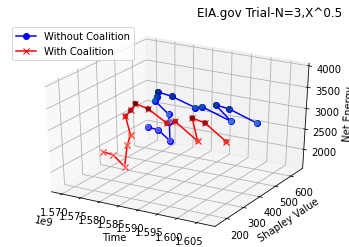

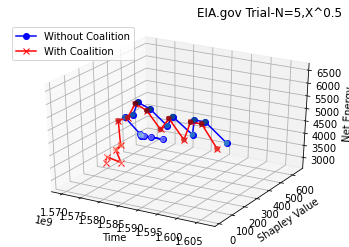

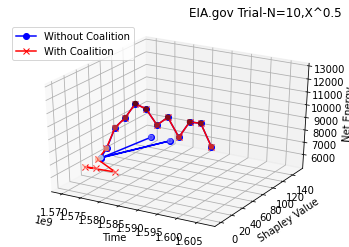

In [6]:
a=10000000 # Scalar for NRGXChange Payment Function g(.)
n=0.5 # Exponential of the characteristiv function Y=X^(n=0.5)
for trial in eia_dataset_trials:
    trial = nrgx.apply_payments(trial,a,n)

nrgx.plot_trials(trials=eia_dataset_trials,n=n)

In [ ]:
Fuzzy logic to replicate the results .
Use a fuzzy logic controller. 